In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime as dt
from matplotlib import dates as mdates

In [6]:
df=pd.read_csv('covid_dataset_final.csv')

In [7]:
#we will create a list of all unique location names so that we can store its starting as well as ending index
locations=df.location.unique()

#we will create 2 dict to store starting and ending indices of the country in the DataFrame this will make traversal 
#over DF very easy

start_index={}
end_index={}

for places in locations:
    if(pd.notnull(places)):
        start_index[places]=-1
        start_index[places]=-1
        
for index, row in df.iterrows():
    if(pd.notnull(row['location']) and start_index[row['location']]== -1):
        start_index[row['location']]=index
    if(pd.notnull(row['location'])):
        end_index[row['location']]=index

In [148]:
def plot_new_cases(loc,vaccinated=False,dead=False):
    date_new_cases={}
    date_vaccinated={}
    date_dead={}
    s_ind=start_index[loc]
    e_ind=end_index[loc]
    for i in range(s_ind,e_ind):
        all_details=dict(df.iloc[i])
        if(pd.notnull(all_details['date']) and pd.notnull(all_details['new_cases'])):
            date_new_cases[all_details['date']]=all_details['new_cases']
        if(pd.notnull(all_details['date']) and pd.notnull(all_details['people_vaccinated'])):
            date_vaccinated[all_details['date']]=(all_details['people_vaccinated']/1000)
        if(pd.notnull(all_details['date']) and pd.notnull(all_details['new_deaths'])):
            date_dead[all_details['date']]=all_details['new_deaths']*10
            
    dates=list(date_new_cases.keys())
    cases=list(date_new_cases.values())
    
    plt.rcParams["figure.figsize"] = [12.50, 8.50]
    plt.rcParams["figure.autolayout"] = True

    x_values = [dt.strptime(d, "%Y-%m-%d").date() for d in dates]
    y_values = cases
    ax = plt.gca()

    x_axis=[x_values[i] for i in range(0,len(x_values),20)]
    
    formatter = mdates.DateFormatter("%Y-%m-%d")
    ax.xaxis.set_major_formatter(formatter)
    locator = mdates.DayLocator()
    ax.xaxis.set_major_locator(locator)
    ax.set_xticks(x_axis)
    plt.plot(x_values, y_values,'g-',label='New Covid Cases')
    if vaccinated==True:
        x_vaccinated=[dt.strptime(d, "%Y-%m-%d").date() for d in date_vaccinated.keys()]
        y_vaccinated=list(date_vaccinated.values())
        plt.plot(x_vaccinated,y_vaccinated,'b-',label='Number of Vaccinated People in Thousand')
    s="Trend of new COVID cases in "+loc+" over the years"
    if vaccinated==True:
        s="Trend in new Covid cases vs Trend in People getting vaccinated in '"+loc+"'"
    
    if(dead==True):
        x_dead=[dt.strptime(d, "%Y-%m-%d").date() for d in date_dead.keys()]
        y_dead=list(date_dead.values())
        plt.plot(x_dead,y_dead,'m-',label='New Deaths')
        s=s="New Covid cases vs No. People getting vaccinated vs New Deaths in '"+loc+"'"
    plt.title(s)
    plt.xlabel('Date')
    plt.ylabel('Cases')
    plt.xticks(rotation=45)
    if(vaccinated==True):
        plt.legend(loc=0)
    plt.savefig(loc+'.jpg')
    plt.show()

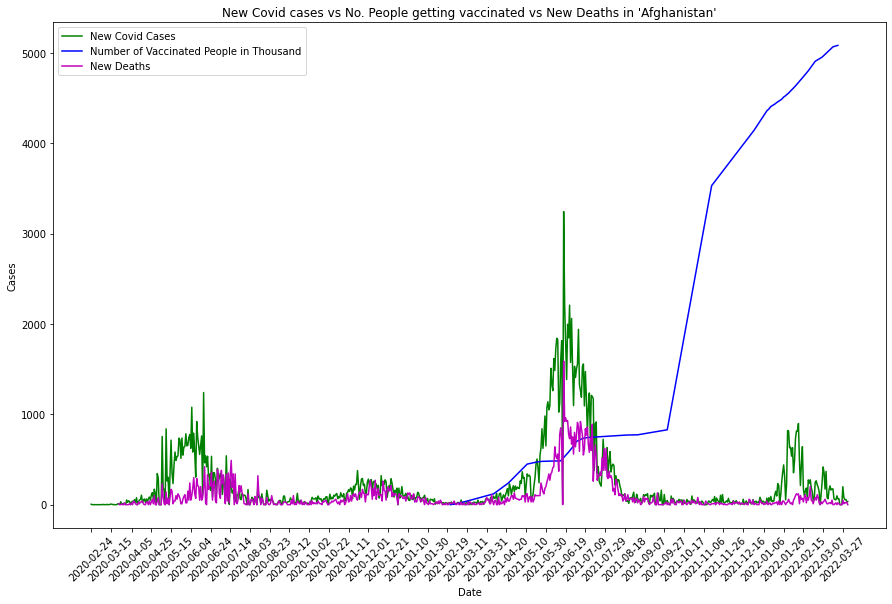

In [149]:
#since the dates were colliding and overlapping in x-axis so I've shown only few x-ticks in x-axis
plot_new_cases(locations[0],vaccinated=True,dead=True)

In [212]:
def strictness_vs_newcases(loc):
    date_new_cases={}
    date_strictness={}
    s_ind=start_index[loc]
    e_ind=end_index[loc]
    for i in range(s_ind,e_ind):
        all_details=dict(df.iloc[i])
        if(pd.notnull(all_details['date']) and pd.notnull(all_details['new_cases'])):
            date_new_cases[all_details['date']]=all_details['new_cases']/1000
        if(pd.notnull(all_details['date']) and pd.notnull(all_details['stringency_index'])):
            date_strictness[all_details['date']]=all_details['stringency_index']
            
    dates=list(date_new_cases.keys())
    cases=list(date_new_cases.values())
    
    plt.rcParams["figure.figsize"] = [12.50, 8.50]
    plt.rcParams["figure.autolayout"] = True

    x_values = [dt.strptime(d, "%Y-%m-%d").date() for d in dates]
    y_values = cases
    ax = plt.gca()

    x_axis=[x_values[i] for i in range(0,len(x_values),20)]
    
    formatter = mdates.DateFormatter("%Y-%m-%d")
    ax.xaxis.set_major_formatter(formatter)
    locator = mdates.DayLocator()
    ax.xaxis.set_major_locator(locator)
    ax.set_xticks(x_axis)
    plt.plot(x_values, y_values,'g-',label='New Covid Cases in Thousands')
    
    x_strictness=[dt.strptime(d, "%Y-%m-%d").date() for d in date_strictness.keys()]
    y_strictness=list(date_strictness.values())
    plt.plot(x_strictness,y_strictness,'r-',label='Stringency_index')
    
    s="New Covid cases vs Stringency_index in '"+loc+"'"
    plt.title(s)
    plt.xlabel('Date')
    plt.ylabel('Cases')
    plt.xticks(rotation=45)
    
    plt.legend(loc=0)
    plt.savefig(loc+'.jpg')
    plt.show()

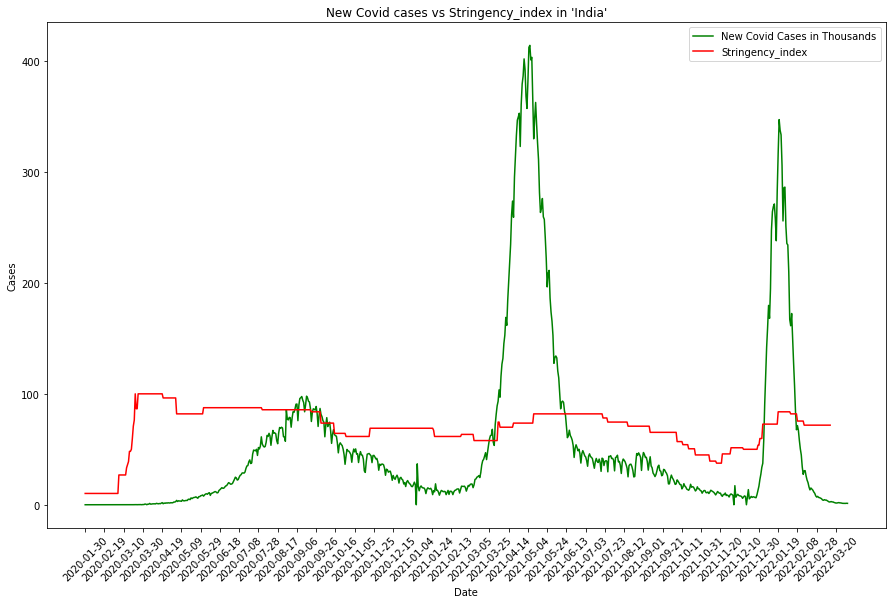

In [213]:
strictness_vs_newcases('India')

In [210]:
def vaccine_dist_vs_newcases(loc):
    date_new_cases={}
    date_new_vaccinations={}
    s_ind=start_index[loc]
    e_ind=end_index[loc]
    for i in range(s_ind,e_ind):
        all_details=dict(df.iloc[i])
        if(pd.notnull(all_details['date']) and pd.notnull(all_details['new_cases'])):
            date_new_cases[all_details['date']]=all_details['new_cases']
        if(pd.notnull(all_details['date']) and pd.notnull(all_details['new_vaccinations'])):
            date_new_vaccinations[all_details['date']]=(all_details['new_vaccinations']/100)
            
    dates=list(date_new_cases.keys())
    cases=list(date_new_cases.values())
    
    plt.rcParams["figure.figsize"] = [12.50, 8.50]
    plt.rcParams["figure.autolayout"] = True

    x_values = [dt.strptime(d, "%Y-%m-%d").date() for d in dates]
    y_values = cases
    ax = plt.gca()

    x_axis=[x_values[i] for i in range(0,len(x_values),20)]
    
    x_new_vaccinations=[dt.strptime(d, "%Y-%m-%d").date() for d in date_new_vaccinations.keys()]
    y_new_vaccinations=list(date_new_vaccinations.values())
    
    index=x_values.index(x_new_vaccinations[0])
    
    formatter = mdates.DateFormatter("%Y-%m-%d")
    ax.xaxis.set_major_formatter(formatter)
    locator = mdates.DayLocator()
    ax.xaxis.set_major_locator(locator)
    ax.set_xticks(x_axis)
    
    
    plt.plot(x_values[index:], y_values[index:],'red',label='New Covid Cases')
    
    plt.plot(x_new_vaccinations,y_new_vaccinations,color='blue',label='Vaccine Distribution')
    
    s="New Covid cases vs Vaccine Distribution in '"+loc+"'"
    plt.title(s)
    plt.xlabel('Date')
    plt.ylabel('Cases')
    plt.xticks(rotation=45)
    
    plt.legend(loc=0)
    plt.savefig(loc+'.jpg')
    plt.show()

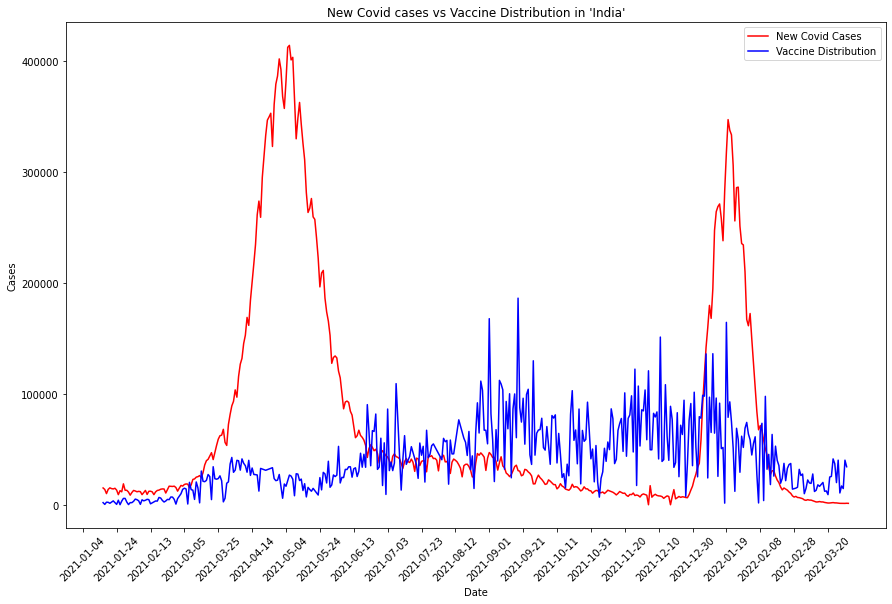

In [211]:
vaccine_dist_vs_newcases('India')

In [304]:
asia={}
europe={}
africa={}
na={}
sa={}
oceania={}

def plot_continent_wise(continent_list=[]):
    global asia
    global europe
    global africa
    global na
    global sa
    global oceania
    continents=list(df.continent.unique())
    rows=df.shape[0]
    for i in range(rows):
        all_info=dict(df.iloc[i])
        if pd.notnull(all_info['date']) and pd.notnull(all_info['continent']) and pd.notnull(all_info['new_cases']):
            if all_info['continent']=='Asia':
                if not all_info['date'] in list(asia.keys()):
                    asia[all_info['date']]=all_info['new_cases']
                else:
                    asia[all_info['date']]+=all_info['new_cases']
            elif all_info['continent']=='Europe':
                if not all_info['date'] in list(europe.keys()):
                    europe[all_info['date']]=all_info['new_cases']
                else:
                    europe[all_info['date']]+=all_info['new_cases']
            elif all_info['continent']=='Africa':
                if not all_info['date'] in list(africa.keys()):
                    africa[all_info['date']]=all_info['new_cases']
                else:
                    africa[all_info['date']]+=all_info['new_cases']
            elif all_info['continent']=='North America':
                if not all_info['date'] in list(na.keys()):
                    na[all_info['date']]=all_info['new_cases']
                else:
                    na[all_info['date']]+=all_info['new_cases']
            elif all_info['continent']=='South America':
                if not all_info['date'] in list(sa.keys()):
                    sa[all_info['date']]=all_info['new_cases']
                else:
                    sa[all_info['date']]+=all_info['new_cases']
            elif all_info['continent']=='Oceania':
                if not all_info['date'] in list(oceania.keys()):
                    oceania[all_info['date']]=all_info['new_cases']
                else:
                    oceania[all_info['date']]+=all_info['new_cases']
    ax = plt.gca()
    plt.rcParams["figure.figsize"] = [12.50, 8.50]
    plt.rcParams["figure.autolayout"] = True
    
    asia=dict(sorted(asia.items()))
    x_values_asia = [dt.strptime(d, "%Y-%m-%d").date() for d in asia.keys()]
    y_values_asia = list(asia.values())
    
    if 'Asia' in continent_list or len(continent_list)==0:
        plt.plot(x_values_asia,y_values_asia,'g',label="Asia")
    
    if 'Africa' in continent_list or len(continent_list)==0:
        africa=dict(sorted(africa.items()))
        x_values_africa = [dt.strptime(d, "%Y-%m-%d").date() for d in africa.keys()]
        y_values_africa = list(africa.values())
        plt.plot(x_values_africa,y_values_africa,'b',label="Africa")
    
    
    if 'Europe' in continent_list or len(continent_list)==0:
        europe=dict(sorted(europe.items()))
        x_values_europe = [dt.strptime(d, "%Y-%m-%d").date() for d in europe.keys()]
        y_values_europe = list(europe.values())
    
        plt.plot(x_values_europe,y_values_europe,'k',label="Europe")
    
    if 'North America' in continent_list or len(continent_list)==0:
        na=dict(sorted(na.items()))
        x_values_na = [dt.strptime(d, "%Y-%m-%d").date() for d in na.keys()]
        y_values_na = list(na.values())
    
        plt.plot(x_values_na,y_values_na,'g',label="North America")   
    
    if 'South America' in continent_list or len(continent_list)==0:
        sa=dict(sorted(sa.items()))
        x_values_sa = [dt.strptime(d, "%Y-%m-%d").date() for d in sa.keys()]
        y_values_sa = list(sa.values())
    
        plt.plot(x_values_sa,y_values_sa,'m',label="South America")
    
    if 'Oceania' in continent_list or len(continent_list)==0:
        oceania=dict(sorted(oceania.items()))
        x_values_o = [dt.strptime(d, "%Y-%m-%d").date() for d in oceania.keys()]
        y_values_o = list(oceania.values())
    
        plt.plot(x_values_o,y_values_o,color='pink',label="Oceania")
    
    x_axis=[x_values_asia[i] for i in range(0,len(x_values_asia),20)]
    
    formatter = mdates.DateFormatter("%Y-%m-%d")
    ax.xaxis.set_major_formatter(formatter)
    locator = mdates.DayLocator()
    ax.xaxis.set_major_locator(locator)
    ax.set_xticks(x_axis)
    
    s="New Covid cases in Continents"
    plt.title(s)
    plt.xlabel('Date')
    plt.ylabel('Cases')
    plt.xticks(rotation=45)
    
    plt.legend(loc=0)
    plt.savefig('continent_wise.jpg')
    plt.show()

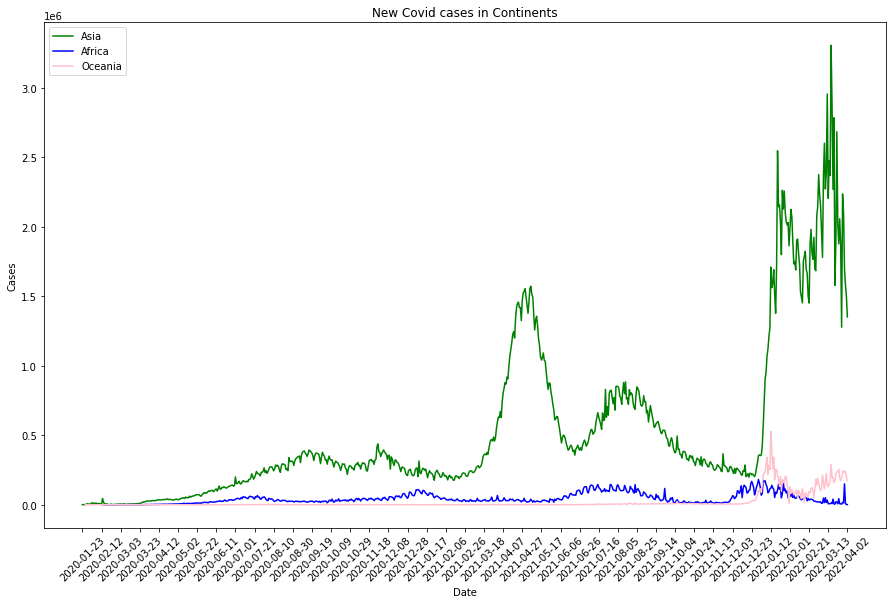

In [307]:
plot_continent_wise(['Asia','Africa','Oceania'])

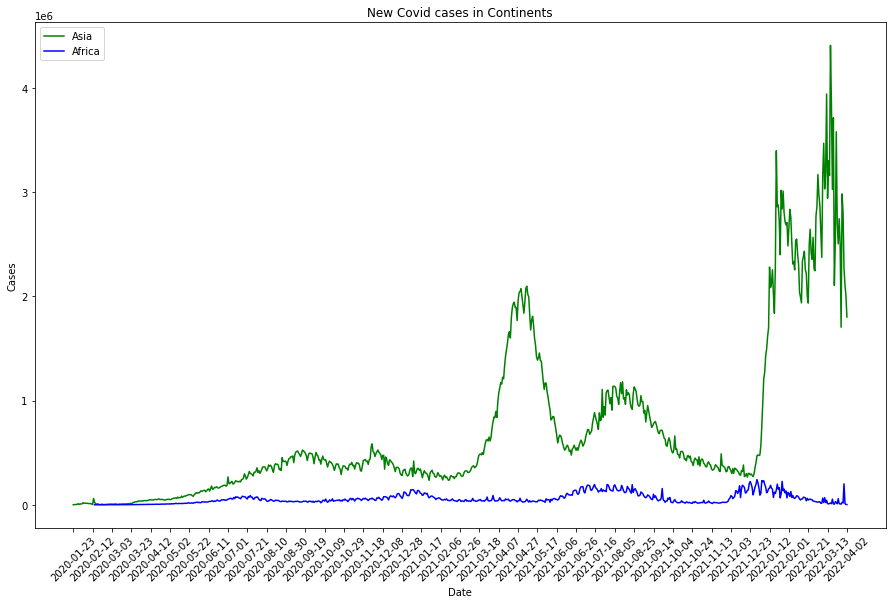

In [308]:
plot_continent_wise(['Asia','Africa'])

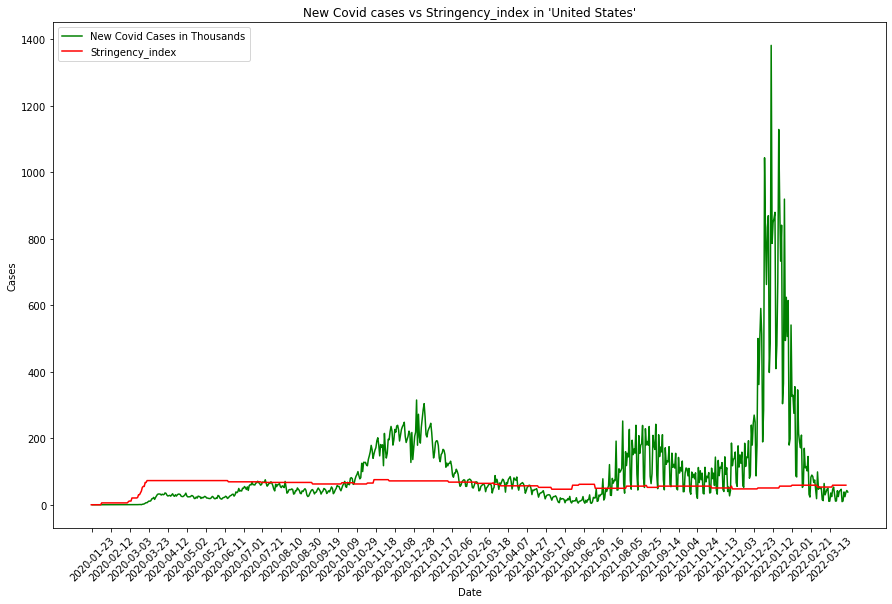

In [310]:
strictness_vs_newcases('United States')